In [1]:
!pip install google-generativeai matplotlib


In [ ]:

!pip install python-dotenv google-generativeai

In [ ]:
!pip install transformers torch matplotlib


In [ ]:
!pip install matplotlib


Without Prompting


API key loaded successfully
******* Evaluation Summary: logical *******
Teaser: A man is found hanging from a ceiling with water on the floor. What happened?
Model Answer: The man was standing on an ice block that melted.
Expected Answer: He stood on an ice block, which melted
Result: Wrong
Time Taken: 3.60 seconds


******* Evaluation Summary: logical *******
Teaser: A man pushes his car to a hotel and tells the owner he's bankrupt. Why?
Model Answer: The man is playing Monopoly.
Expected Answer: He’s playing Monopoly
Result: Correct
Time Taken: 1.60 seconds


******* Evaluation Summary: logical *******
Teaser: You see a boat filled with people. It has not sunk, but when you look again, you don’t see a single person. Why?
Model Answer: All the people in the boat are married.
Expected Answer: All the people were married
Result: Correct
Time Taken: 1.72 seconds


******* Evaluation Summary: logical *******
Teaser: A man dies of old age on his 25th birthday. How is this possible?
Model A

Rate limit exceeded for the question: Solve this ((10*5)+2). Retrying after 5 seconds.
******* Evaluation Summary: mathematical *******
Teaser: Solve this ((10*5)+2)
Model Answer: 52
Expected Answer: 52
Result: Correct
Time Taken: 7.50 seconds


******* Evaluation Summary: mathematical *******
Teaser: A car travels 60 miles per hour for 1 hour, then 40 miles per hour for 1 hour, then 20 miles per hour for 1 hour. What is the average speed for the entire trip? 
Model Answer: 40 miles per hour.
Expected Answer: 30 miles per hour. (Total distance = 60 + 40 + 20 = 120 miles; total time = 3 hours; average speed = 120/3 = 30 miles per hour)
Result: Wrong
Time Taken: 1.65 seconds


******* Evaluation Summary: mathematical *******
Teaser: What comes next in the sequence: 1, 3, 5, 7, ?, 11?
Model Answer: 9
Expected Answer: 9
Result: Correct
Time Taken: 2.23 seconds


******* Overall Evaluation Summary *******
Total Brain Teasers: 20
Correct Answers: 16
Wrong Answers: 4
Total Evaluation Time: 41

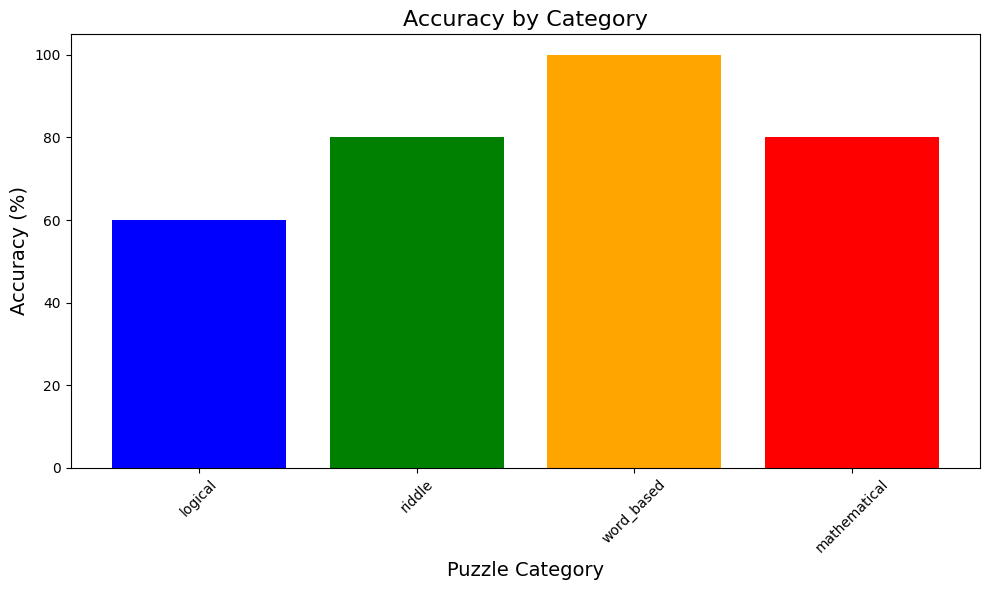

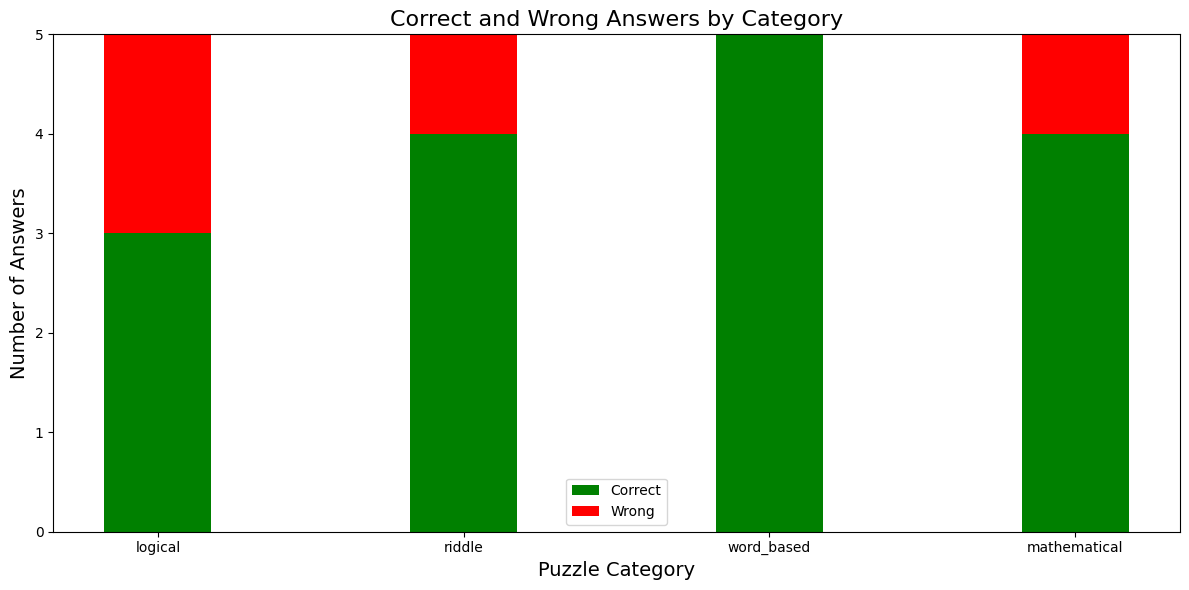

In [14]:
import google.generativeai as genai
import time
from google.api_core.exceptions import TooManyRequests
import matplotlib.pyplot as plt  # Import matplotlib
from difflib import SequenceMatcher  # Import SequenceMatcher

# Step 1: Install the required libraries
!pip install python-dotenv google-generativeai matplotlib

# Step 2: Directly set the API key (replace this with your actual API key)
api_key = "Actual API key"  

# Check if the key is loaded correctly
if not api_key:
    raise ValueError("API key is not set.")
else:
    print("API key loaded successfully")

# Step 3: Configure the Gemini API with the API key
genai.configure(api_key=api_key)
model = genai.GenerativeModel("gemini-pro")

# Step 4: Define a function to get responses from Gemini
def get_gemini_response(question):
    try:
        chat = model.start_chat(history=[])
        response = chat.send_message(question, stream=False)
        return response.text.strip()
    except TooManyRequests as e:  # Handle the TooManyRequests error
        print(f"Rate limit exceeded for the question: {question}. Retrying after 5 seconds.")
        time.sleep(5)  # Wait for 5 seconds before retrying
        return get_gemini_response(question)  # Retry the request
    except Exception as e:
        print(f"An error occurred: {e}")
        return "An error occurred while processing the request."

# Step 5: Define brain teaser categories and add some teasers
categories = {
    "logical": {
        "A man is found hanging from a ceiling with water on the floor. What happened?": "He stood on an ice block, which melted",
        "A man pushes his car to a hotel and tells the owner he's bankrupt. Why?": "He’s playing Monopoly",
        "You see a boat filled with people. It has not sunk, but when you look again, you don’t see a single person. Why?": "All the people were married",
        "A man dies of old age on his 25th birthday. How is this possible?": "He was born on February 29th",
        "The more you take, the more you leave behind. What am I?": "Footsteps"
    },
    "riddle": {
        "What has keys but can't open locks?": "A piano",
        "What has a heart that doesn't beat?": "Artichoke",
        "What can travel around the world while staying in the same corner?": "Stamp",
        "The more of me you take, the more you leave behind. What am I?": "Footsteps",
        "What begins with T, ends with T, and has T in it?": "A teapot"
    },
    "word_based": {
        "Rearrange the letters of 'stressed' to spell a word related to desserts.": "Desserts",
        "What comes once in a minute, twice in a moment, but never in a thousand years?": "The letter M",
        "What begins with T, ends with T, and has T in it?": "A teapot",
        "What has to be broken before you can use it?": "An egg",
        "The more you have of it, the less you see. What is it?": "Darkness"
    },
    "mathematical": {
        "What is 7 + 3 * 2?": "13",
        "If it takes 6 men 6 hours to build 6 houses, how long will it take 2 men to build 2 houses?": "6 hours",
        "Solve this ((10*5)+2)": "52",
        "A car travels 60 miles per hour for 1 hour, then 40 miles per hour for 1 hour, then 20 miles per hour for 1 hour. What is the average speed for the entire trip? ":"30 miles per hour. (Total distance = 60 + 40 + 20 = 120 miles; total time = 3 hours; average speed = 120/3 = 30 miles per hour)",
        "What comes next in the sequence: 1, 3, 5, 7, ?, 11?": "9"
    }
}

# Step 6: Initialize evaluation summary
summary = {
    "total_teasers": 0,
    "correct": 0,
    "wrong": 0,
    "time_taken": 0,
    "category_results": {category: {"correct": 0, "wrong": 0, "total": 0} for category in categories}
}

# Step 7: Function to check if model's answer is close enough to the expected answer using SequenceMatcher
def check_answer(model_answer, expected_answer):
    # Compare the model's answer with the expected answer using SequenceMatcher
    similarity = SequenceMatcher(None, model_answer.lower(), expected_answer.lower()).ratio()
    return similarity > 0.75  # You can adjust this threshold as needed

# Step 8: Evaluate the model's answers for each brain teaser
for category, teasers in categories.items():
    for teaser, expected_answer in teasers.items():
        summary["total_teasers"] += 1
        summary["category_results"][category]["total"] += 1

        # Time the response generation
        start_time = time.time()
        model_answer = get_gemini_response(teaser)
        end_time = time.time()

        time_taken = end_time - start_time
        summary["time_taken"] += time_taken

        # Compare the response using the check_answer function
        if check_answer(model_answer, expected_answer):
            result = "Correct"
            summary["correct"] += 1
            summary["category_results"][category]["correct"] += 1
        else:
            result = "Wrong"
            summary["wrong"] += 1
            summary["category_results"][category]["wrong"] += 1

        # Print individual teaser evaluation
        print(f"******* Evaluation Summary: {category} *******")
        print(f"Teaser: {teaser}")
        print(f"Model Answer: {model_answer}")
        print(f"Expected Answer: {expected_answer}")
        print(f"Result: {result}")
        print(f"Time Taken: {time_taken:.2f} seconds")
        print("\n")

# Step 9: Final metrics
average_time = summary["time_taken"] / summary["total_teasers"] if summary["total_teasers"] > 0 else 0
accuracy = (summary["correct"] / summary["total_teasers"]) * 100 if summary["total_teasers"] > 0 else 0
error_rate = (summary["wrong"] / summary["total_teasers"]) * 100 if summary["total_teasers"] > 0 else 0

print("******* Overall Evaluation Summary *******")
print(f"Total Brain Teasers: {summary['total_teasers']}")
print(f"Correct Answers: {summary['correct']}")
print(f"Wrong Answers: {summary['wrong']}")
print(f"Total Evaluation Time: {summary['time_taken']:.2f} seconds")
print(f"Average Time per Teaser: {average_time:.2f} seconds")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Error Rate: {error_rate:.2f}%")
print("\n")

# Step 10: Category-Wise Results
print("******* Category-Wise Results *******")
for category, results in summary["category_results"].items():
    print(f"{category}:")
    print(f"  Correct: {results['correct']}")
    print(f"  Wrong: {results['wrong']}")
    print(f"  Total: {results['total']}")
    category_accuracy = (results["correct"] / results["total"]) * 100 if results["total"] > 0 else 0
    print(f"  Accuracy: {category_accuracy:.2f}%")
print("\n")

# Step 11: Category-Wise Accuracy Breakdown
print("Category-Wise Breakdown:")
accuracies = []  # List to store accuracies for each category
correct_counts = []  # List to store correct counts for each category
wrong_counts = []  # List to store wrong counts for each category
for category, results in summary["category_results"].items():
    category_accuracy = (results["correct"] / results["total"]) * 100 if results["total"] > 0 else 0
    print(f"  - {category}: {category_accuracy:.2f}% accuracy")
    accuracies.append(category_accuracy)  # Store accuracy for plotting
    correct_counts.append(results["correct"])  # Store correct answers count
    wrong_counts.append(results["wrong"])  # Store wrong answers count

# Step 12: Plot the performance (Accuracy Graph)
plt.figure(figsize=(10, 6))
plt.bar(categories.keys(), accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Accuracy by Category', fontsize=16)
plt.xlabel('Puzzle Category', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 13: Plot Correct and Wrong Answers for Each Category (Separate Graph)
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # The width of the bars
ind = range(len(categories))  # X-axis positions

# Create the bars for correct and wrong answers
ax.bar(ind, correct_counts, width, label='Correct', color='green')
ax.bar(ind, wrong_counts, width, bottom=correct_counts, label='Wrong', color='red')

# Add labels and title
ax.set_title('Correct and Wrong Answers by Category', fontsize=16)
ax.set_xlabel('Puzzle Category', fontsize=14)
ax.set_ylabel('Number of Answers', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(categories.keys())
ax.legend()

plt.tight_layout()
plt.show()


With Prompting


API key loaded successfully


Rate limit exceeded for the question: Solve this ((10*5)+2). Retrying after 5 seconds.


Rate limit exceeded for the question: A car travels 60 miles per hour for 1 hour, then 40 miles per hour for 1 hour, then 20 miles per hour for 1 hour. What is the average speed for the entire trip? . Retrying after 5 seconds.


Rate limit exceeded for the question: A car travels 60 miles per hour for 1 hour, then 40 miles per hour for 1 hour, then 20 miles per hour for 1 hour. What is the average speed for the entire trip? . Retrying after 5 seconds.


Rate limit exceeded for the question: A car travels 60 miles per hour for 1 hour, then 40 miles per hour for 1 hour, then 20 miles per hour for 1 hour. What is the average speed for the entire trip? . Retrying after 5 seconds.


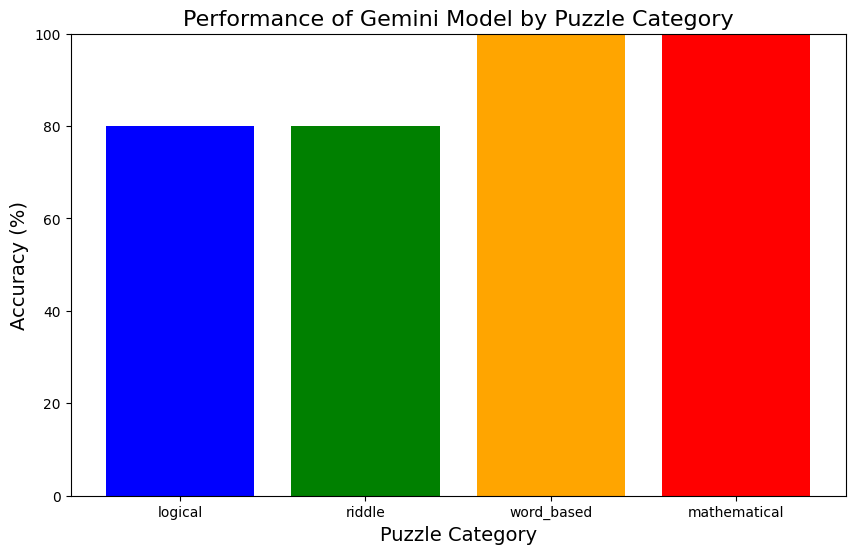

<Figure size 640x480 with 0 Axes>

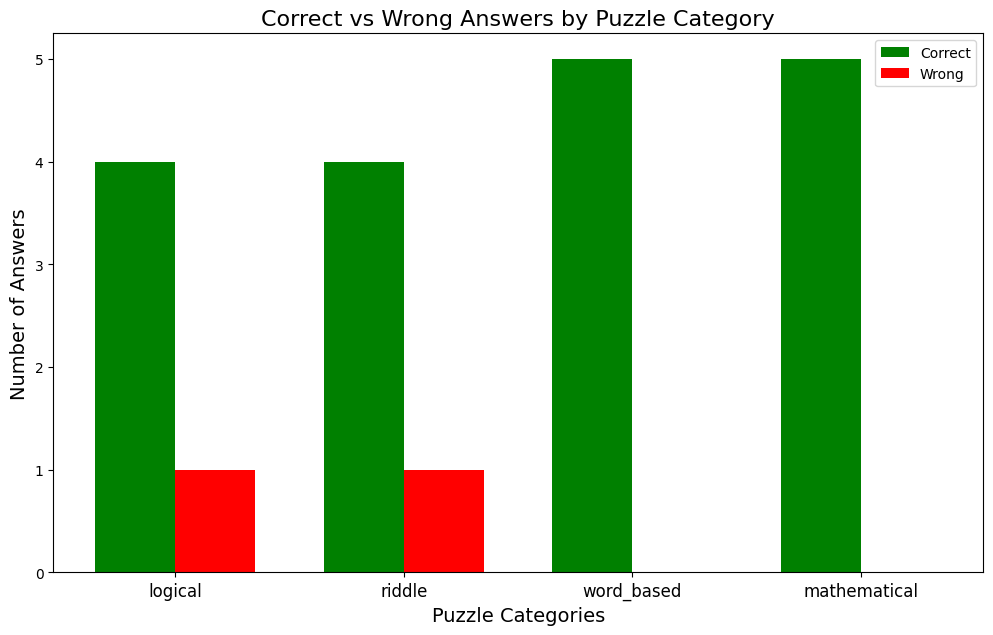

In [6]:
import google.generativeai as genai
import time
from google.api_core.exceptions import TooManyRequests
import matplotlib.pyplot as plt  # Import matplotlib
from difflib import SequenceMatcher  # Import SequenceMatcher

# Step 1: Install the required libraries
!pip install python-dotenv google-generativeai matplotlib

# Step 2: Directly set the API key (replace this with your actual API key)
api_key = "Actual API Key"  

# Check if the key is loaded correctly
if not api_key:
    raise ValueError("API key is not set.")
else:
    print("API key loaded successfully")

# Step 3: Configure the Gemini API with the API key
genai.configure(api_key=api_key)
model = genai.GenerativeModel("gemini-pro")

# Step 4: Define a function to get responses from Gemini using few-shot prompting
def get_gemini_response(question):
    few_shot_prompt = """
    You are an AI model trained to solve brain teasers. Here are some examples:

    Example 1:
    Teaser: A man is found hanging from a ceiling with water on the floor. What happened?
    Model Answer: He stood on an ice block, which melted.

    Example 2:
    Teaser: A man pushes his car to a hotel and tells the owner he's bankrupt. Why?
    Model Answer: He’s playing Monopoly.

    Example 3:
    Teaser: You see a boat filled with people. It has not sunk, but when you look again, you don’t see a single person. Why?
    Model Answer: All the people were married.

    Now, solve this new brain teaser:

    Teaser: """ + question

    try:
        chat = model.start_chat(history=[])
        response = chat.send_message(few_shot_prompt, stream=False)
        return response.text.strip()
    except TooManyRequests as e:  # Handle the TooManyRequests error
        print(f"Rate limit exceeded for the question: {question}. Retrying after 5 seconds.")
        time.sleep(5)  # Wait for 5 seconds before retrying
        return get_gemini_response(question)  # Retry the request
    except Exception as e:
        print(f"An error occurred: {e}")
        return "An error occurred while processing the request."

# Step 5: Define brain teaser categories and add some teasers
categories = {
    "logical": {
        "A man is found hanging from a ceiling with water on the floor. What happened?": "He stood on an ice block, which melted",
        "A man pushes his car to a hotel and tells the owner he's bankrupt. Why?": "He’s playing Monopoly",
        "You see a boat filled with people. It has not sunk, but when you look again, you don’t see a single person. Why?": "All the people were married",
        "A man dies of old age on his 25th birthday. How is this possible?": "He was born on February 29th",
        "The more you take, the more you leave behind. What am I?": "Footsteps"
    },
    "riddle": {
        "What has keys but can't open locks?": "A piano",
        "What has a heart that doesn't beat?": "Artichoke",
        "What can travel around the world while staying in the same corner?": "Stamp",
        "The more of me you take, the more you leave behind. What am I?": "Footsteps",
        "What begins with T, ends with T, and has T in it?": "A teapot"
    },
    "word_based": {
        "Rearrange the letters of 'stressed' to spell a word related to desserts.": "Desserts",
        "What comes once in a minute, twice in a moment, but never in a thousand years?": "The letter M",
        "What begins with T, ends with T, and has T in it?": "A teapot",
        "What has to be broken before you can use it?": "An egg",
        "The more you have of it, the less you see. What is it?": "Darkness"
    },
    "mathematical": {
        "What is 7 + 3 * 2?": "13",
        "If it takes 6 men 6 hours to build 6 houses, how long will it take 2 men to build 2 houses?": "6 hours",
        "Solve this ((10*5)+2)": "52",
        "A car travels 60 miles per hour for 1 hour, then 40 miles per hour for 1 hour, then 20 miles per hour for 1 hour. What is the average speed for the entire trip? ": "30 miles per hour",
        "What comes next in the sequence: 1, 3, 5, 7, ?, 11?": "9"
    }
}

# Step 6: Initialize evaluation summary
summary = {
    "total_teasers": 0,
    "correct": 0,
    "wrong": 0,
    "time_taken": 0,
    "category_results": {category: {"correct": 0, "wrong": 0, "total": 0} for category in categories}
}

# Step 7: Function to check if model's answer matches the expected answer by word
def check_answer(model_answer, expected_answer):
    cleaned_model_answer = model_answer.lower().split()
    cleaned_expected_answer = expected_answer.lower().split()
    if any(word in cleaned_expected_answer for word in cleaned_model_answer):
        return True
    return False

# Step 8: Evaluate the model's answers for each brain teaser
for category, teasers in categories.items():
    for teaser, expected_answer in teasers.items():
        summary["total_teasers"] += 1
        summary["category_results"][category]["total"] += 1

        start_time = time.time()
        model_answer = get_gemini_response(teaser)
        end_time = time.time()

        time_taken = end_time - start_time
        summary["time_taken"] += time_taken

        if check_answer(model_answer, expected_answer):
            result = "Correct"
            summary["correct"] += 1
            summary["category_results"][category]["correct"] += 1
        else:
            result = "Wrong"
            summary["wrong"] += 1
            summary["category_results"][category]["wrong"] += 1

# Step 9: Visualization of Results
categories_names = list(summary["category_results"].keys())
accuracies = [
    (results["correct"] / results["total"]) * 100 if results["total"] > 0 else 0
    for results in summary["category_results"].values()
]

# Accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(categories.keys(), accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance of Gemini Model by Puzzle Category', fontsize=16)
plt.xlabel('Puzzle Category', fontsize=14)
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.show()

# Spacing between graphs
plt.subplots_adjust(hspace=0.5)

# Correct vs Wrong per category graph
correct_counts = [results["correct"] for results in summary["category_results"].values()]
wrong_counts = [results["wrong"] for results in summary["category_results"].values()]
bar_width = 0.35
x = range(len(categories_names))

plt.figure(figsize=(12, 7))
plt.bar(x, correct_counts, width=bar_width, label='Correct', color='green')
plt.bar([i + bar_width for i in x], wrong_counts, width=bar_width, label='Wrong', color='red')
plt.xticks([i + bar_width / 2 for i in x], categories_names, fontsize=12)
plt.xlabel("Puzzle Categories", fontsize=14)
plt.ylabel("Number of Answers", fontsize=14)
plt.title("Correct vs Wrong Answers by Puzzle Category", fontsize=16)
plt.legend()
plt.show()
